<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/House_EjercMio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
 pip install catboost

In [5]:
 pip install shap

In [6]:
# gestión de datos
import numpy as np # Importa la librería numpy para operaciones numéricas
import pandas as pd # Importa la librería pandas para manipulación de datos (DataFrames)

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta
# Estos módulos están comentados, pero si los necesitas para trabajar con fechas,
# descoméntalos y añade una breve descripción de su función

# gráficos
import seaborn as sns # Importa la librería seaborn para visualización de datos
import matplotlib.pyplot as plt # Importa la librería matplotlib para crear gráficos

# preprocessing
from sklearn.preprocessing import StandardScaler # Importa StandardScaler para estandarización de datos
from sklearn.model_selection import train_test_split # Importa train_test_split para dividir datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestRegressor # Importa RandomForestRegressor para modelos de regresión con Random Forest

# modelos
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet # Importa varios modelos lineales
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Importa modelos de ensamble
from xgboost import XGBRegressor # Importa el modelo XGBoost
from catboost import CatBoostRegressor # Importa el modelo CatBoost

# metricas
import sklearn.metrics as metrics # Importa el módulo metrics para evaluar el modelo

# hiperparametrizado
from sklearn.model_selection import GridSearchCV # Importa GridSearchCV para búsqueda de hiperparámetros

# interpretabilidad
import shap # Importa la librería SHAP para interpretar los modelos

# quitar alertas
import warnings
warnings.filterwarnings("ignore") # Ignora las advertencias para un código más limpio

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None) # Muestra todas las columnas del DataFrame en la salida

np.random.seed(42) # Fija la semilla aleatoria para la reproducibilidad de los resultados

In [7]:
#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
house=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/House_Pricing.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
house.head(20)



Mounted at /content/drive


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [8]:
house.tail()
#house.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#número de valores únicos que hay en cada variable
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [11]:
#Suma los valores True (que representan valores faltantes) a lo largo de cada columna del DataFrame.
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

boxplot

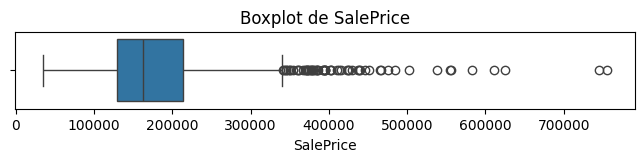

In [12]:
#Define la variable target
target = 'SalePrice'

# Crea la figura y los ejes del gráfico
fig, ax = plt.subplots(figsize=(8, 1))

# Genera el boxplot usando seaborn
sns.boxplot(data=house, x=target)

# Añade un título al gráfico
plt.title(f'Boxplot de {target}') #esto es opcional, pero ayuda a saber de q es el grafico

# Muestra el gráfico
plt.show()

In [13]:
#Creamos un nuevo csv para no modificar el 1º
houseCopy = house.copy()

In [14]:
#Borramos el id porq no es necesario
houseCopy.drop('Id', axis=1, inplace=True)

In [15]:
houseCopy.duplicated().sum()

0

**scatterplots**

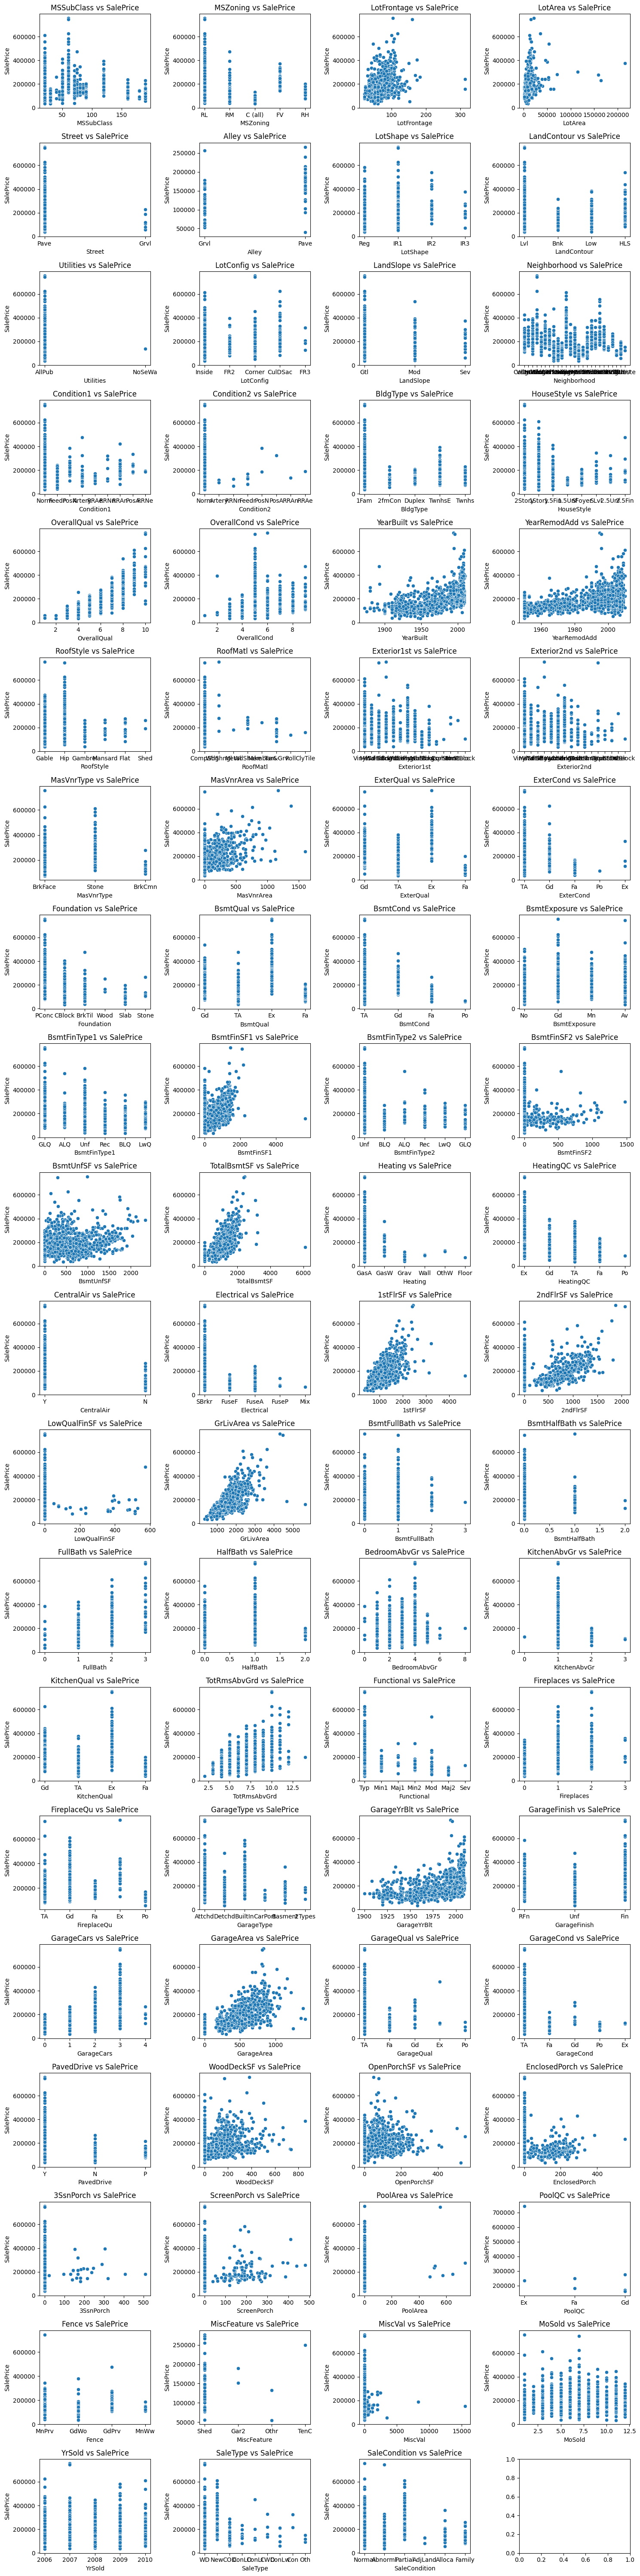

In [16]:
target = 'SalePrice'
# Variables para hacer 4 scatterplot por línea
graficos_por_fila = 4
variables = list(houseCopy.columns)
variables.remove(target)
num_variables = len(variables)

# Configura la cuadrícula de gráficos
fig, axes = plt.subplots(nrows=(num_variables + graficos_por_fila - 1) // graficos_por_fila, ncols=graficos_por_fila, figsize=(15, 60))
axes = axes.flatten()


# Crea un scatterplot para cada variable en relación a la variable objetivo
for i, var in enumerate(variables):
    sns.scatterplot(data=houseCopy, x=var, y=target, ax=axes[i])
    axes[i].set_title(f'{var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

# **Análisis de correlación**



*   Valores cercanos a 1: Indican una fuerte correlación positiva.
*   Valores cercanos a -1: Indican una fuerte correlación negativa
*   Valores cercanos a 0: Indican poca o ninguna correlación.








In [17]:
# Identificar las columnas no numéricas
print(houseCopy.dtypes)

# Seleccionar solo las columnas numéricas
house_numerico = houseCopy.select_dtypes(include=[np.number])

# Calcular la matriz de correlación con las columnas numéricas
matriz_correlacion = house_numerico.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object
               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101 

**Visualización de la matriz**

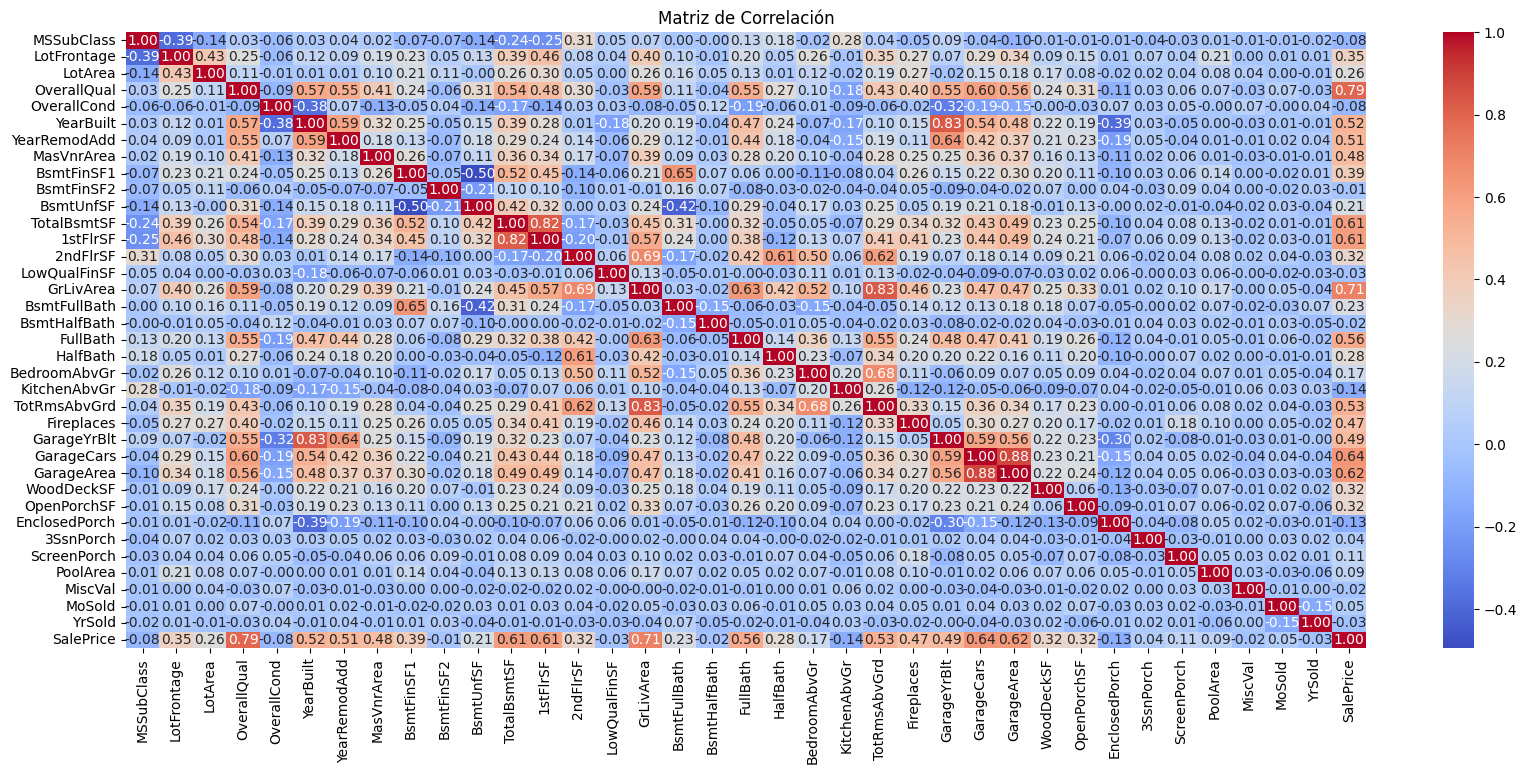

In [18]:
# Seleccionar solo las columnas numéricas
house_numerico = houseCopy.select_dtypes(include=[np.number])

# Calcular la matriz de correlación con las columnas numéricas
matriz_correlacion = house_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [19]:
# Verificar si hay valores faltantes
valores_faltantes = houseCopy.isnull().sum()

# Mostrar los valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [20]:
# Eliminar filas con valores faltantes en 'LotFrontage'
house_sin_faltantes = houseCopy.dropna(subset=['LotFrontage'])

Los **outliers** (valores atípicos) son datos que se desvían significativamente del resto de los datos en un conjunto. Pueden ser mucho más altos o mucho más bajos que la mayoría de los valores. Los outliers pueden surgir por errores de medición, errores de entrada de datos o pueden ser valores válidos pero raros.

In [21]:
# Función para identificar outliers usando el método IQR (Rango Intercuartílico)
def identificar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    return outliers

# Función para eliminar outliers

def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    df_sin_outliers = df[~((df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR)))]
    return df_sin_outliers

# Identificar y tratar outliers en todas las columnas numéricas del DataFrame
columnas_numericas = houseCopy.select_dtypes(include=[np.number]).columns

for columna in columnas_numericas:
    outliers = identificar_outliers(houseCopy, columna)
    print(f"Outliers en '{columna}':")
    print(outliers)

   # houseCopy = eliminar_outliers(houseCopy, columna)

# Mostrar el DataFrame sin outliers
print("DataFrame sin outliers:")
print(houseCopy)

Se han truncado las últimas 5000 líneas del flujo de salida.
769           60       RL         47.0    53504   Pave   NaN      IR2   
798           60       RL        104.0    13518   Pave   NaN      Reg   
803           60       RL        107.0    13891   Pave   NaN      Reg   
961           60       RL          NaN    12227   Pave   NaN      IR1   
1024          20       RL          NaN    15498   Pave   NaN      IR1   
1031          75       RL        102.0    15863   Pave   NaN      Reg   
1046          60       RL         85.0    16056   Pave   NaN      IR1   
1142          60       RL         77.0     9965   Pave   NaN      Reg   
1169          60       RL        118.0    35760   Pave   NaN      IR1   
1173          50       RL        138.0    18030   Pave   NaN      IR1   
1175          50       RL         85.0    10678   Pave   NaN      Reg   
1182          60       RL        160.0    15623   Pave   NaN      IR1   
1268          50       RL          NaN    14100   Pave   NaN   

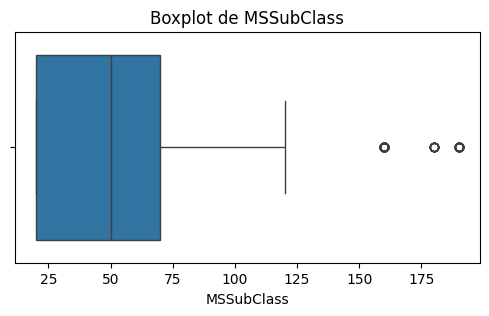

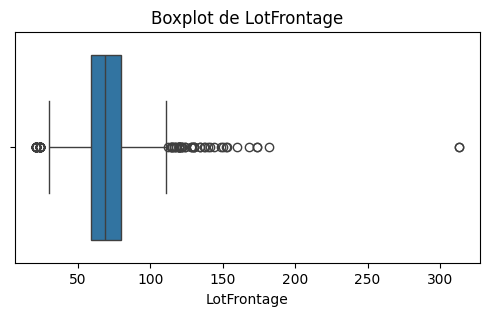

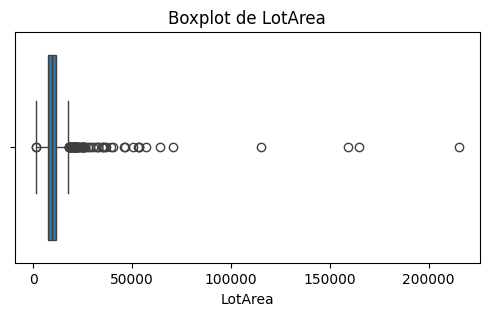

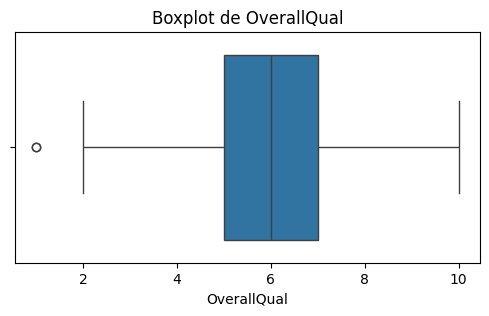

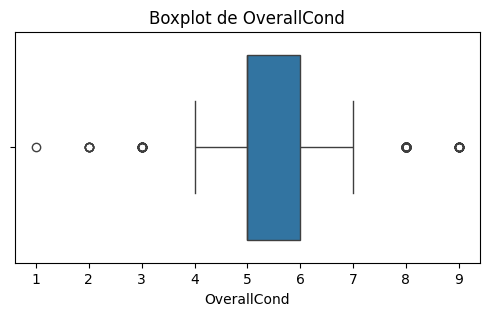

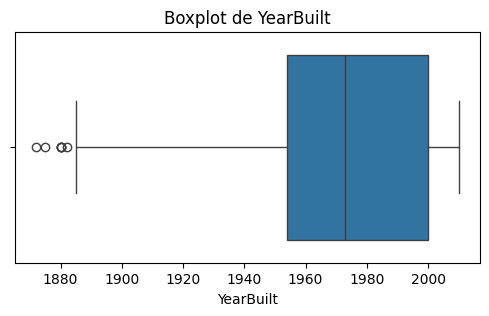

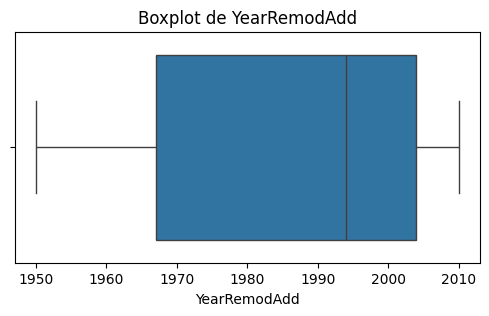

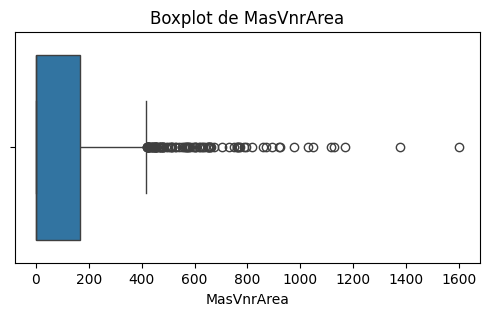

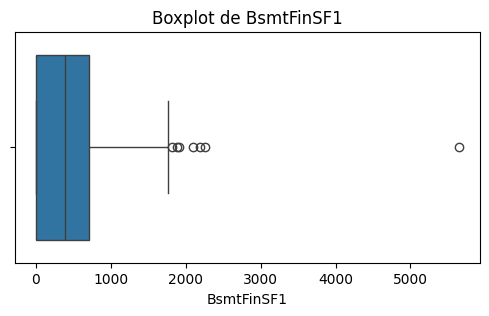

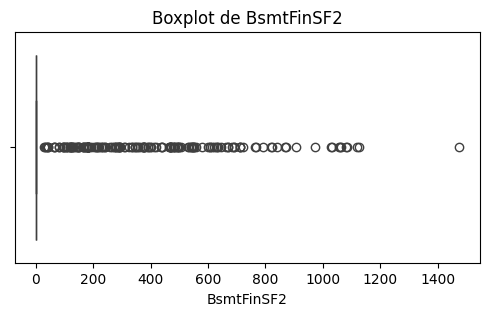

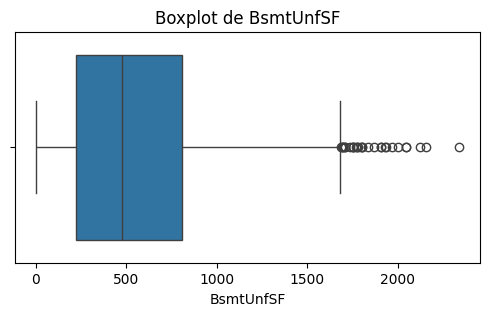

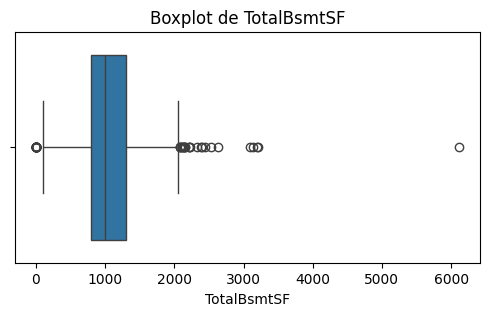

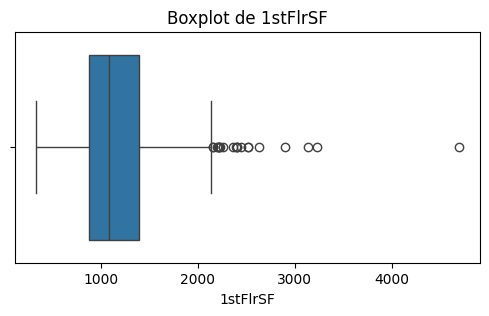

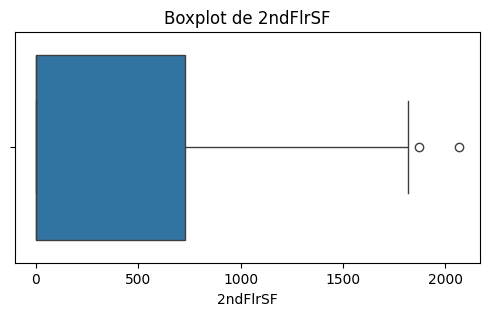

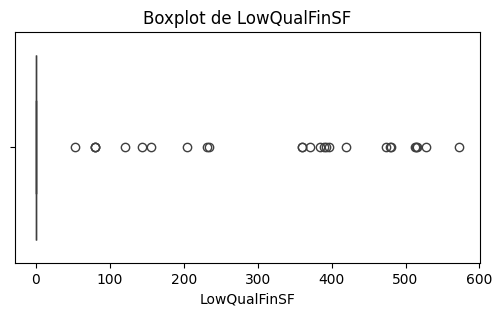

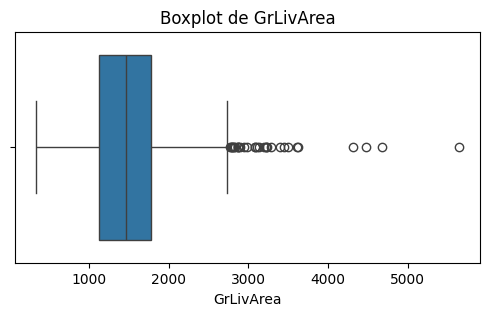

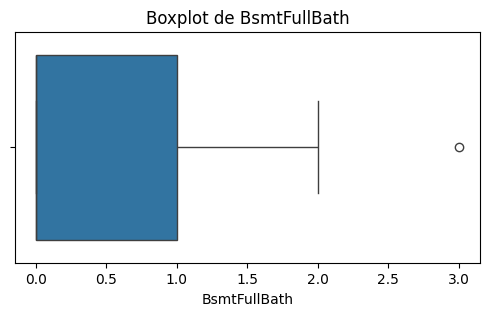

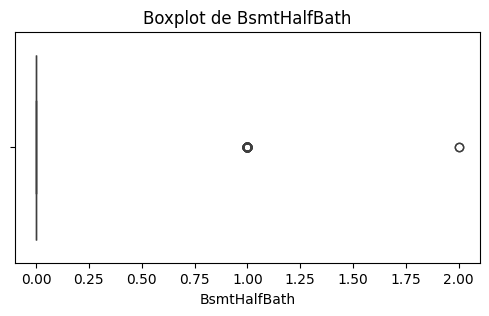

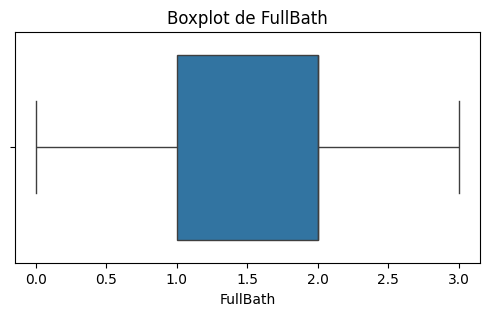

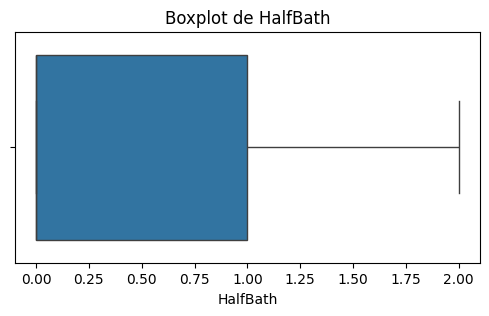

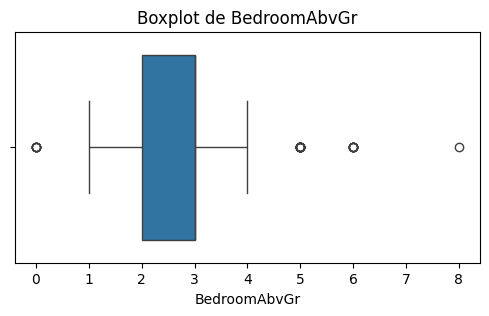

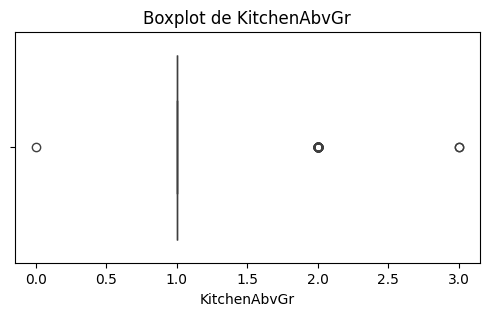

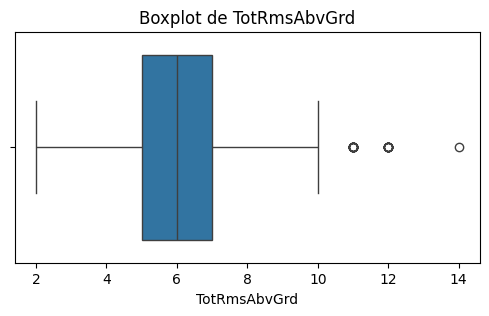

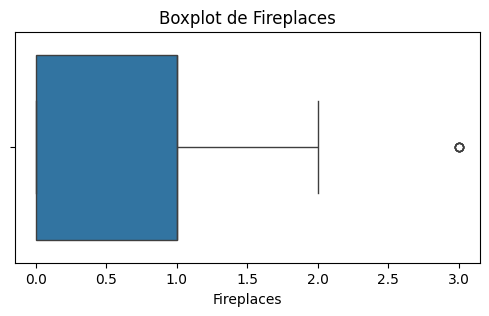

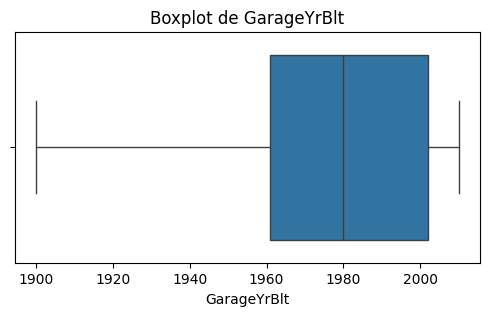

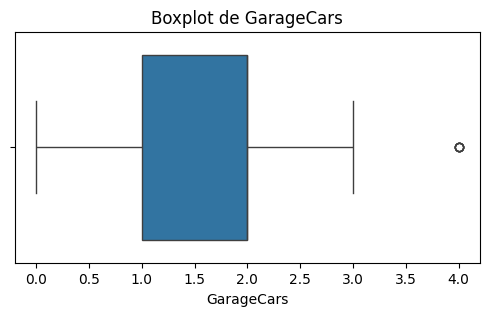

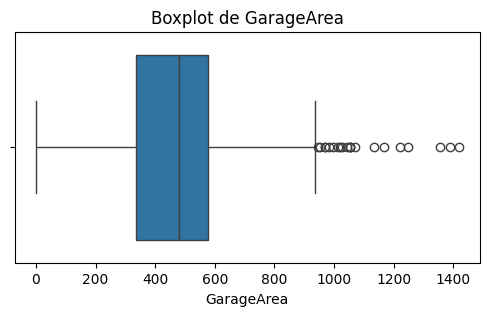

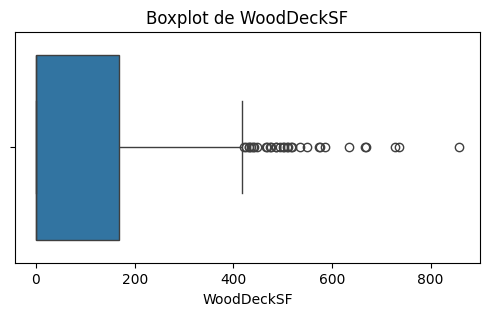

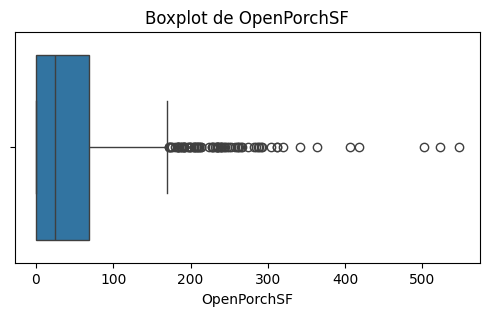

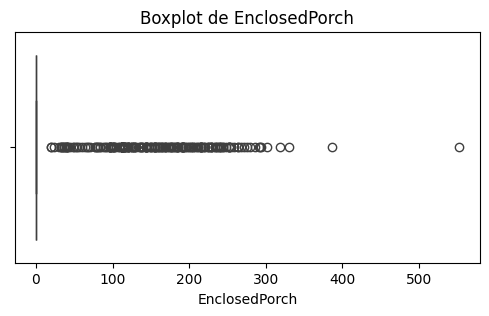

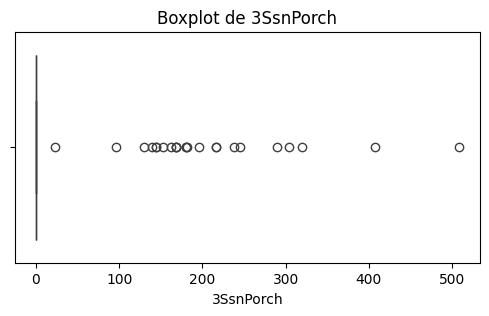

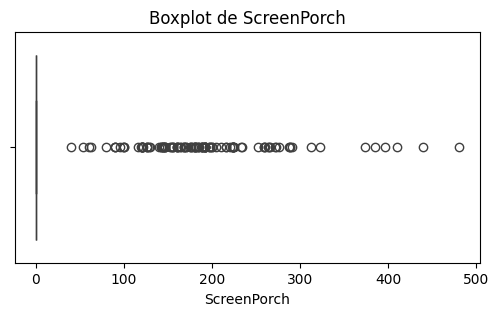

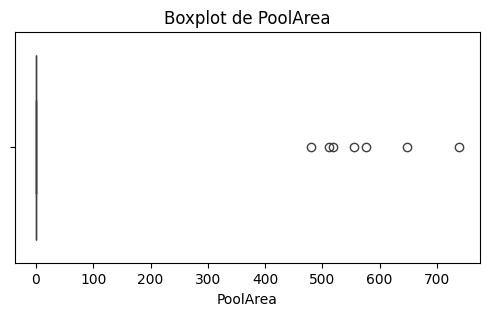

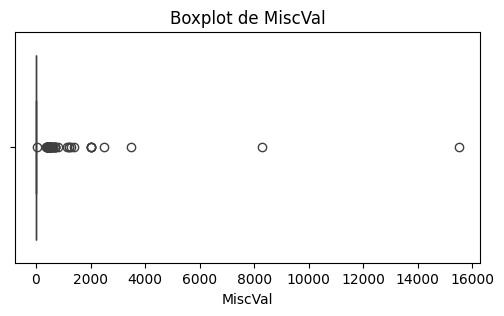

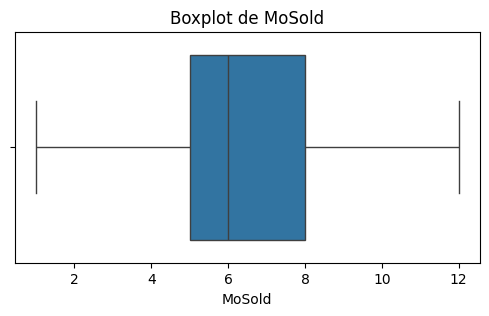

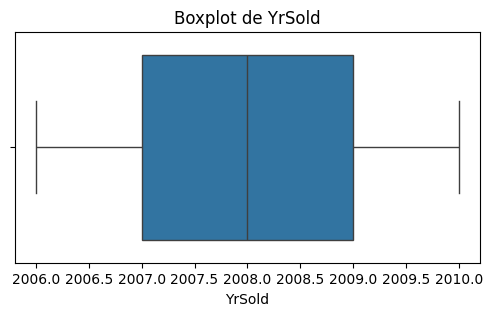

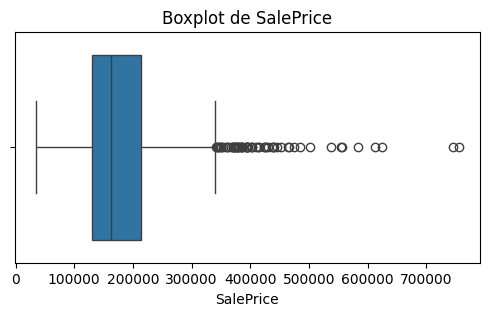

In [22]:
# Visualizar los outliers usando boxplots
for columna in columnas_numericas:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=houseCopy[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()

In [23]:
# Identificar columnas numéricas
columnas_numericas = houseCopy.select_dtypes(include=[np.number]).columns # Changed 'colum' to 'columns'
print(columnas_numericas)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [24]:
houseCopy.shape

(1460, 80)

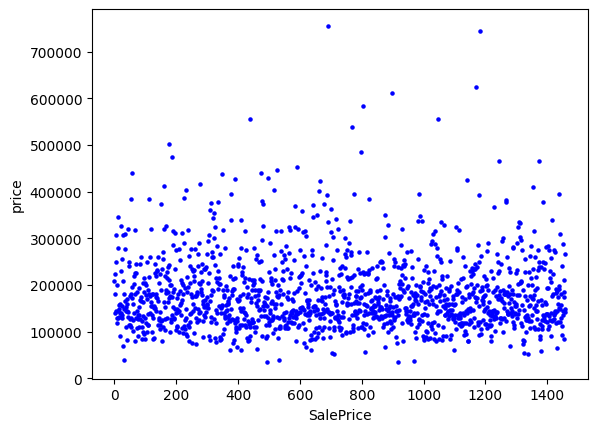

In [25]:
# Crear un gráfico de dispersión
plt.scatter(range(houseCopy.shape[0]), houseCopy['SalePrice'], s=5, color='blue')
# range(houseCopy.shape[0]) genera una secuencia de números desde 0 hasta el número de filas en houseCopy, usado como el eje X
# houseCopy['SalePrice'] son los valores de la columna SalePrice del DataFrame houseCopy, usados como el eje Y
# s=5 establece el tamaño de los puntos en el gráfico
# color='blue' establece el color de los puntos en azul

# Etiquetar el eje X
plt.xlabel('SalePrice')
# plt.xlabel() añade una etiqueta al eje X del gráfico
# 'SalePrice' es el texto de la etiqueta del eje X

# Etiquetar el eje Y
plt.ylabel('price')
# plt.ylabel() añade una etiqueta al eje Y del gráfico
# 'price' es el texto de la etiqueta del eje Y

# Mostrar el gráfico
plt.show()
# plt.show() muestra el gráfico en la pantalla

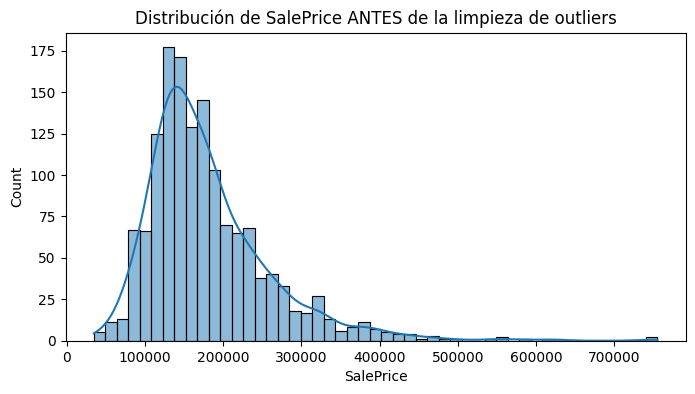

In [26]:
# 1. Crear el histograma ANTES
plt.figure(figsize=(8, 4))
sns.histplot(houseCopy['SalePrice'], kde=True)
plt.title('Distribución de SalePrice ANTES de la limpieza de outliers')
plt.show()

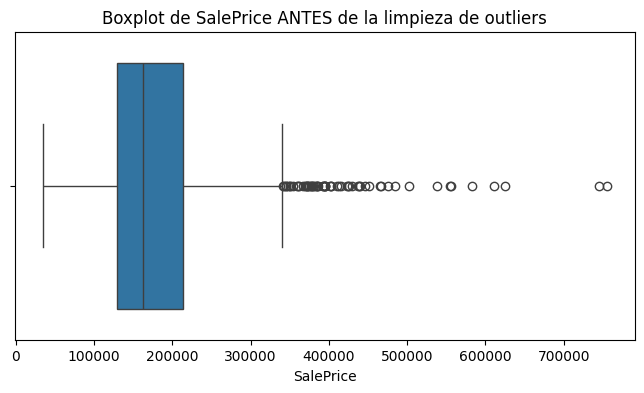

In [27]:
# 4. Visualiza con boxplot ANTES
plt.figure(figsize=(8, 4))
sns.boxplot(x=houseCopy['SalePrice'])
plt.title('Boxplot de SalePrice ANTES de la limpieza de outliers')
plt.show()



In [28]:
# 2. Calcula el IQR
Q1 = houseCopy['SalePrice'].quantile(0.25)
# Calcula el primer cuartil (Q1), que es el valor por debajo del cual se encuentra el 25% de los datos

Q3 = houseCopy['SalePrice'].quantile(0.75)
# Calcula el tercer cuartil (Q3), que es el valor por debajo del cual se encuentra el 75% de los datos

IQR = Q3 - Q1
# Calcula el rango intercuartílico (IQR), que es la diferencia entre el tercer y el primer cuartil. El IQR mide la dispersión de los datos.

# 3. Calcula los límites para los outliers
limite_superior = Q3 + 1.5 * IQR
# Calcula el límite superior para identificar outliers. Los valores por encima de este límite se consideran outliers.

limite_inferior = Q1 - 1.5 * IQR
# Calcula el límite inferior para identificar outliers. Los valores por debajo de este límite se consideran outliers.

# 5. Elimina los outliers
houseCopy_sin_outliers = houseCopy[(houseCopy['SalePrice'] >= limite_inferior) & (houseCopy['SalePrice'] <= limite_superior)]
# Filtra el DataFrame houseCopy para eliminar las filas que contienen outliers en la columna 'SalePrice'.
# Solo se mantienen las filas donde 'SalePrice' está entre el límite inferior y el límite superior.

# Verificar si la última línea se ha ejecutado correctamente
if not houseCopy_sin_outliers.empty:
    print("Se ha ejecutado")
    # Si el DataFrame houseCopy_sin_outliers no está vacío, imprime "Se ha ejecutado".
else:
    print("Error")
    # Si el DataFrame houseCopy_sin_outliers está vacío, imprime "Error".

Se ha ejecutado


**Vemos los valores nulos**

Debemos borrar los valores nulos, en este caso vamos a rellenar con la mediana

In [29]:
houseCopy_sin_outliers['LotFrontage'] = houseCopy_sin_outliers['LotFrontage'].fillna(houseCopy_sin_outliers['LotFrontage'].median())
 # Llena los valores nulos en 'LotFrontage' con la mediana de la columna

In [30]:
valores_nulos = houseCopy_sin_outliers.isnull().sum()

# Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


# **Transformación de Variables Categóricas Ordinales:**
Identifica las variables categóricas

In [31]:
# Mostrar los datos únicos de cada columna
for column in houseCopy_sin_outliers.columns:
    unique_values = houseCopy_sin_outliers[column].unique()
    print(f"Columna '{column}' tiene los siguientes valores únicos: {unique_values}")
print("#############################################")
    # Detectar columnas con datos repetidos
print("\nColumnas con datos repetidos:")
for column in houseCopy_sin_outliers.columns:
    value_counts = houseCopy_sin_outliers[column].value_counts()
    repeated_values = value_counts[value_counts > 1]
    if not repeated_values.empty:
        print(f"Columna '{column}' tiene los siguientes valores repetidos:")
        print(repeated_values)


Columna 'MSSubClass' tiene los siguientes valores únicos: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Columna 'MSZoning' tiene los siguientes valores únicos: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Columna 'LotFrontage' tiene los siguientes valores únicos: [ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120.  92. 134.  62.
  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43.  93.  30. 129.
 140.  35.  37. 118.  87. 116.  49.  96.  59.  36. 102.  58.  38. 109.
  56. 130.  53. 137.  45. 106.  42.  39. 144. 128. 149. 103. 313. 104.
 114. 168. 107. 182. 138. 152. 124. 153.  46.]
Columna 'LotArea' tiene los siguientes valores únicos: [ 8450  9600 11250 ... 17217 13175  9717]
Columna 'Street' tiene los siguientes valores únicos: ['Pave' 'Grvl']
Columna 'Alley' tiene 

# **Paso 1: Identificar las variables categóricas ordinales**

ExterQual

ExterCond

BsmtQual

BsmtCond

HeatingQC

KitchenQual

FireplaceQu

GarageQual

GarageCond

PoolQC

Fence

In [32]:
#Crear un diccionario de valores ya que todas comprates las iniciales
# Diccionarios de mapeo
qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
fence_mapping = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}

# Lista de columnas a mapear con el diccionario de calidad
columns_to_map = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# Transformar las columnas usando .map()
for column in columns_to_map:
    houseCopy_sin_outliers[column] = houseCopy_sin_outliers[column].map(qual_mapping)

# Transformar la columna 'Fence' usando su diccionario específico
houseCopy_sin_outliers['Fence'] = houseCopy_sin_outliers['Fence'].map(fence_mapping)

# Mostrar el DataFrame transformado
print(houseCopy_sin_outliers)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl   

# **Transformación de Variables Categóricas No Ordinales**



MSSubClass

MSZoning

Street

Alley

LotShape

LandContour

Utilities

LotConfig

LandSlope

Neighborhood

Condition1

Condition2

BldgType

HouseStyle

RoofStyle

RoofMatl

Exterior1st

Exterior2nd

MasVnrType

Foundation

BsmtExposure

BsmtFinType1

BsmtFinType2

Heating

CentralAir

Electrical

Functional

GarageType

GarageFinish

PavedDrive

MiscFeature

SaleType

SaleCondition

In [33]:
# Lista de columnas categóricas no ordinales
categorical_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

# Aplicar One-Hot Encoding
houseCopy_sin_outliers_one_hot = pd.get_dummies(houseCopy_sin_outliers, columns=categorical_columns)

# Mostrar el DataFrame transformado
print(houseCopy_sin_outliers_one_hot.head())

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  \
0       196.0          4          3       4.0       3.0         706   
1         0.0          3          3       4.0       3.0         978   
2       162.0          4          3       4.0       3.0         486   
3         0.0          3          3       3.0       4.0         216   
4       350.0          4          3       4.0       3.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150        

In [34]:
# Identificar columnas con nulos
nulos = houseCopy_sin_outliers_one_hot.isnull().sum().sort_values(ascending=False)
print('Columnas con Nulos:\n', nulos[nulos>0])

# Imputar nulos con la mediana
for col in nulos[nulos>0].index:
  houseCopy_sin_outliers_one_hot[col] = houseCopy_sin_outliers_one_hot[col].fillna(houseCopy_sin_outliers_one_hot[col].median())

Columnas con Nulos:
 PoolQC         1393
Fence          1122
FireplaceQu     689
GarageCond       81
GarageYrBlt      81
GarageQual       81
BsmtQual         37
BsmtCond         37
MasVnrArea        7
dtype: int64


In [35]:
houseCopy_sin_outliers_one_hot.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  \
0       196.0          4          3       4.0       3.0         706   
1         0.0          3          3       4.0       3.0         978   
2       162.0          4          3       4.0       3.0         486   
3         0.0          3          3       3.0       4.0         216   
4       350.0          4          3       4.0       3.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856          5       856       854   
1           0        284         1262          5      1262         0   
2           0        434          920          5       920       866   
3           0        540          756          4       961       756   
4           0        490         1145          5      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1            4             8           0   
1             3             1            3             6           1   
2             3             1            4             6           1   
3             3             1            4             7           1   
4             4             1            4             9           1   

   FireplaceQu  GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  \
0          3.0       2003.0           2         548         3.0         3.0   
1          3.0       1976.0           2         460         3.0         3.0   
2          3.0       2001.0           2         608         3.0         3.0   
3          4.0       1998.0           3         642         3.0         3.0   
4          3.0       2000.0           3         836         3.0         3.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   PoolQC  Fence  MiscVal  MoSold  YrSold  SalePrice  MSSubClass_20  \
0     4.0    3.0        0       2    2008     208500          False   
1     4.0    3.0        0       5    2007     181500           True   
2     4.0    3.0        0       9    2008     223500          False   
3     4.0    3.0        0       2    2006     140000          False   
4     4.0    3.0        0      12    2008     250000          False   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False          Fals

# **Análisis de Correlación y Eliminación de Variables:**

In [36]:
# Seleccionar las columnas no numéricas
non_numeric_columns = houseCopy_sin_outliers_one_hot.select_dtypes(include=['object']).columns


# Mostrar las columnas no numéricas
print("Columnas no numéricas:")
print(non_numeric_columns)

Columnas no numéricas:
Index([], dtype='object')


**Hacer copia de seguridad copy**

In [37]:
houseCopy_sin_num = houseCopy_sin_outliers_one_hot.copy()

In [38]:
# Calcular la matriz de correlación
correlation_matrix = houseCopy_sin_num.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                       LotFrontage   LotArea  OverallQual  OverallCond  \
LotFrontage               1.000000  0.307507     0.183728    -0.038371   
LotArea                   0.307507  1.000000     0.070548     0.004398   
OverallQual               0.183728  0.070548     1.000000    -0.071040   
OverallCond              -0.038371  0.004398    -0.071040     1.000000   
YearBuilt                 0.088830  0.001485     0.561141    -0.361703   
...                            ...       ...          ...          ...   
SaleCondition_AdjLand    -0.035746 -0.013852    -0.041088    -0.040293   
SaleCondition_Alloca     -0.019374  0.013731    -0.055682    -0.039837   
SaleCondition_Family      0.022022 -0.007977    -0.017246    -0.025979   
SaleCondition_Normal     -0.045422  0.007900    -0.075004     0.145815   
SaleCondition_Partial     0.095623  0.016505     0.248461    -0.129157   

                       YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
LotFrontage             0.088830      

In [39]:
houseCopy_sin_outliers_one_hot.isnull().sum().sum()

0

**Paso 2: Identificar pares de variables altamente correlacionadas**

Visualización de la Matriz de Correlación

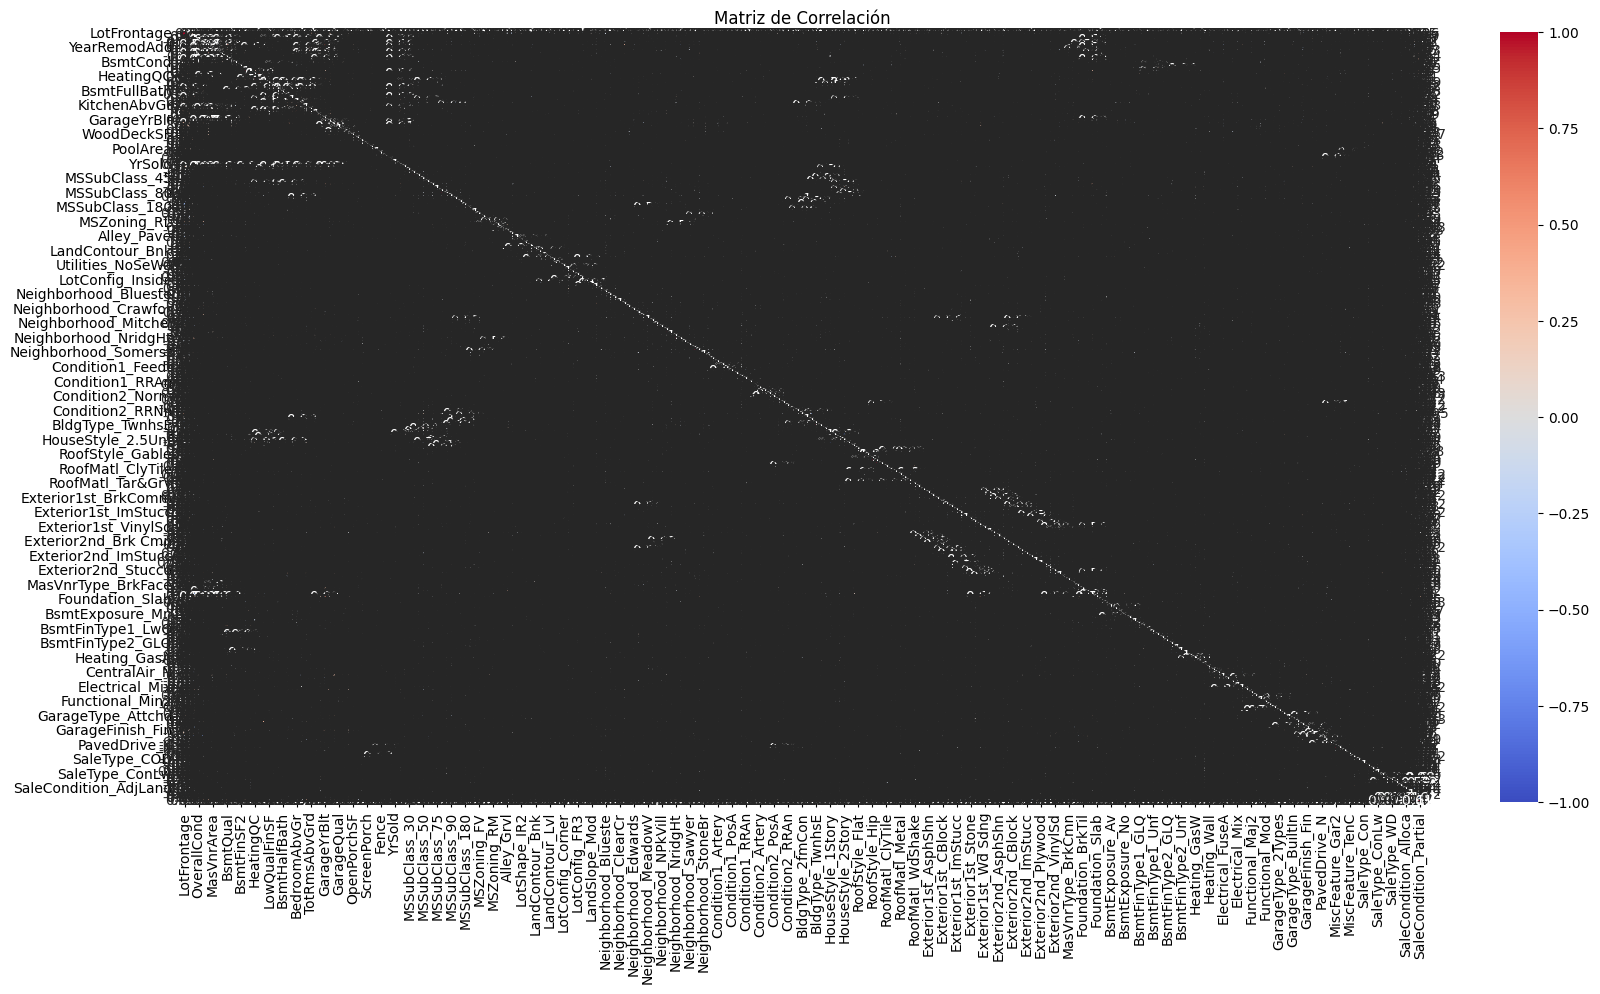

In [40]:
# Importamos la función figure de Matplotlib para ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))  # Configura el tamaño de la figura a 20x10 pulgadas

# Usamos Seaborn para crear un mapa de calor a partir de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# - correlation_matrix: la matriz que contiene los valores de correlación
# - annot=False: no muestra los valores numéricos directamente en el mapa de calor (cámbialo a True si los quieres ver)
# - cmap='coolwarm': usa el esquema de colores "coolwarm" para representar los valores

# Añadimos un título al gráfico
plt.title('Matriz de Correlación')  # Título del mapa de calor

# Mostramos el gráfico generado
plt.show()  # Renderiza y muestra la visualización


Identificación de Pares de Variables Altamente Correlacionadas

In [41]:
# Definimos un umbral (threshold) para considerar que dos variables están altamente correlacionadas
threshold = 0.8  # Cualquier valor de correlación absoluta mayor a 0.8 será considerado alto

# Creamos una lista vacía para almacenar los pares de variables altamente correlacionadas
high_corr_pairs = []  # Cada elemento será una tupla con los nombres de las dos variables y su valor de correlación

# Iteramos sobre todas las combinaciones posibles de columnas en la matriz de correlación
for i in range(len(correlation_matrix.columns)):  # Recorremos las columnas usando su índice
    for j in range(i + 1, len(correlation_matrix.columns)):  # Recorremos las columnas siguientes para evitar duplicados
        # Verificamos si el valor absoluto de la correlación entre las dos columnas es mayor que el umbral
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Si la condición se cumple, añadimos una tupla con los nombres de las columnas y su valor de correlación
            high_corr_pairs.append(
                (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

# Mostramos el mensaje inicial indicando que se imprimirán los pares de variables altamente correlacionadas
print("Pares de variables altamente correlacionadas:")

# Iteramos sobre la lista de pares altamente correlacionados y los imprimimos
for pair in high_corr_pairs:
    # Imprimimos los nombres de las dos variables y el valor de correlación formateado a 2 decimales
    print(f'{pair[0]} - {pair[1]}: {pair[2]:.2f}')


Pares de variables altamente correlacionadas:
2ndFlrSF - HouseStyle_2Story: 0.81
GrLivArea - TotRmsAbvGrd: 0.81
GarageCars - GarageArea: 0.88
MiscVal - MiscFeature_Gar2: 0.89
MSSubClass_45 - HouseStyle_1.5Unf: 0.93
MSSubClass_50 - HouseStyle_1.5Fin: 0.94
MSSubClass_80 - HouseStyle_SLvl: 0.94
MSSubClass_90 - BldgType_Duplex: 1.00
MSSubClass_190 - BldgType_2fmCon: 0.98
MSZoning_FV - Neighborhood_Somerst: 0.87
MSZoning_RL - MSZoning_RM: -0.81
Street_Grvl - Street_Pave: -1.00
LotShape_IR1 - LotShape_Reg: -0.93
Utilities_AllPub - Utilities_NoSeWa: -1.00
LandSlope_Gtl - LandSlope_Mod: -0.91
RoofStyle_Flat - RoofMatl_Tar&Grv: 0.83
RoofStyle_Gable - RoofStyle_Hip: -0.93
Exterior1st_AsbShng - Exterior2nd_AsbShng: 0.85
Exterior1st_CBlock - Exterior2nd_CBlock: 1.00
Exterior1st_CemntBd - Exterior2nd_CmentBd: 0.99
Exterior1st_HdBoard - Exterior2nd_HdBoard: 0.88
Exterior1st_MetalSd - Exterior2nd_MetalSd: 0.97
Exterior1st_VinylSd - Exterior2nd_VinylSd: 0.98
Exterior1st_Wd Sdng - Exterior2nd_Wd Sdng: 

Selección de Variables a Eliminar

In [42]:
# Calculamos la correlación de cada variable con el target ('SalePrice') en el DataFrame
corr_with_target = houseCopy_sin_num.corr()['SalePrice']
# Esto devuelve una serie con los coeficientes de correlación entre 'SalePrice' y el resto de columnas numéricas

# Creamos una lista vacía para almacenar las columnas que se eliminarán
columns_to_drop = []

# Iteramos sobre los pares de variables altamente correlacionadas previamente identificados
for pair in high_corr_pairs:
    var1 = pair[0]  # Primera variable del par
    var2 = pair[1]  # Segunda variable del par

    # Comparamos la correlación de ambas variables con 'SalePrice'
    # Si var1 tiene una correlación más baja (en valor absoluto), se agrega a la lista de columnas a eliminar
    if abs(corr_with_target[var1]) < abs(corr_with_target[var2]):
        columns_to_drop.append(var1)
    else:  # De lo contrario, se agrega var2
        columns_to_drop.append(var2)

# Eliminamos duplicados de la lista de columnas a eliminar para evitar que se repitan
columns_to_drop = list(set(columns_to_drop))

# Imprimimos la lista final de variables que se eliminarán
print(f'variables a eliminar {columns_to_drop}')

# Creamos una nueva copia del DataFrame eliminando las columnas seleccionadas
houseCopy_sin_num_clean = houseCopy_sin_num.drop(columns=columns_to_drop, axis=1)
# axis=1 indica que estamos eliminando columnas (no filas)

# Imprimimos el tamaño del DataFrame tras eliminar las columnas
print(houseCopy_sin_num_clean.shape)  # Esto muestra el número de filas y columnas restantes


variables a eliminar ['Exterior2nd_MetalSd', 'SaleCondition_Partial', 'MiscFeature_Gar2', 'GarageArea', 'Exterior2nd_Wd Sdng', 'LandSlope_Mod', 'TotRmsAbvGrd', 'RoofStyle_Hip', 'Exterior2nd_HdBoard', 'MSSubClass_50', 'HouseStyle_2Story', 'Exterior2nd_CBlock', 'Street_Pave', 'Utilities_NoSeWa', 'BldgType_Duplex', 'RoofMatl_Tar&Grv', 'MSSubClass_80', 'MSZoning_FV', 'PavedDrive_N', 'MSZoning_RL', 'MSSubClass_45', 'Exterior2nd_VinylSd', 'LotShape_IR1', 'Exterior2nd_AsbShng', 'MSSubClass_190', 'CentralAir_Y', 'Exterior1st_CemntBd', 'Electrical_FuseA']
(1399, 237)


**Separar Variables Predictoras (X) y Variable Objetivo (y)**

*Acción:** Crea dos variables: `X` (DataFrame) que contenga todas las columnas predictoras y `y` (Series) que contenga la variable objetivo (`SalePrice`).

In [43]:
#Contiene todas las columnas predictoras
X = houseCopy_sin_num_clean.drop(target, axis=1)
#corresponde a SalePrice, se le indico en filas anteriores de codigo
y = houseCopy_sin_num_clean[target]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Esta línea divide los datos en conjuntos de entrenamiento y prueba.
# - X: DataFrame con las variables predictoras.
# - y: Series con la variable objetivo ('SalePrice').
# - test_size=0.3: 30% de los datos se usarán para prueba, el 70% restante para entrenamiento.
# - random_state=42: Fija una semilla para que la división sea reproducible.

# Estandarización de las variables predictoras
scaler = StandardScaler()
# Crea un objeto StandardScaler, que sirve para estandarizar las variables.
# La estandarización consiste en transformar los datos de manera que tengan media 0 y desviación estándar 1.

X_train_scaled = scaler.fit_transform(X_train)
# Estandariza los datos del conjunto de entrenamiento (X_train):
# 1. scaler.fit(X_train): Calcula la media y la desviación estándar de cada columna de X_train. Estos valores se guardan en el objeto 'scaler'.
# 2. scaler.transform(X_train): Aplica la transformación de estandarización a cada valor de X_train, utilizando los valores de media y desviación estándar calculados en el paso anterior.
# El resultado se guarda en una nueva variable X_train_scaled.

X_test_scaled = scaler.transform(X_test)
# Aplica la transformación de estandarización a los datos del conjunto de prueba (X_test):
# - scaler.transform(X_test): Aplica la estandarización utilizando los valores de media y desviación estándar calculados con X_train.
# Es crucial NO volver a ajustar el scaler con X_test, para que la transformación sea coherente entre train y test.
# El resultado se guarda en una nueva variable X_test_scaled.

# la competición de modelos

In [45]:
# Competición de Modelos
# ----------------------

# 1. Crear una lista de modelos que se pondrán a competir
modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('Ridge', Ridge(random_state=42)))
modelos.append(('SGDRegressor', SGDRegressor(random_state=42)))
modelos.append(('Lasso', Lasso(random_state=42)))
modelos.append(('ElasticNet', ElasticNet(random_state=42)))
modelos.append(('RandomForestRegressor', RandomForestRegressor(random_state=42)))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)))
modelos.append(('XGBRegressor', XGBRegressor(random_state=42)))
modelos.append(('CatBoostRegressor', CatBoostRegressor(verbose=False, random_state=42)))
# Esta sección crea una lista llamada `modelos`, donde se añaden diferentes modelos de regresión.
# Cada modelo se añade como una tupla que contiene su nombre y una instancia del modelo.
# `random_state=42` se usa para que los resultados sean reproducibles.

# 2. Crear un DataFrame para almacenar los resultados de cada modelo
metricas_modelos = pd.DataFrame(columns=['modelo', 'RMSE'])
# Se crea un DataFrame vacío llamado `metricas_modelos`, donde se almacenarán los resultados de cada modelo.
# Las columnas del DataFrame son:
#   - 'modelo': El nombre del modelo.
#   - 'RMSE': El valor del error cuadrático medio (RMSE) del modelo.

# 3. Iterar sobre cada modelo, entrenarlo, evaluarlo y almacenar los resultados
for nombre, modelo in modelos:
    # Entrenar el modelo
    modelo.fit(X_train_scaled, y_train)
    # Entrena el modelo utilizando los datos de entrenamiento estandarizados (X_train_scaled)
    # y la variable objetivo de entrenamiento (y_train).

    # Hacer la predicción sobre el dataset de test
    y_pred = modelo.predict(X_test_scaled)
    # Realiza la predicción con el modelo entrenado, utilizando los datos de test estandarizados (X_test_scaled).
    # El resultado se guarda en la variable y_pred.

    # Calcular el RMSE
    rmse = metrics.root_mean_squared_error(y_test, y_pred)
    # Calcula el error cuadrático medio (RMSE), utilizando la variable objetivo de prueba (y_test)
    # y las predicciones hechas por el modelo (y_pred).

    # Imprimir el resultado por modelo
    metricas_modelos = pd.concat([
        metricas_modelos,
        pd.DataFrame({'modelo': nombre, 'RMSE': rmse}, index=[0])
    ])
    # Añade una nueva fila al DataFrame `metricas_modelos` con el nombre del modelo y el valor de RMSE.
    # La función `pd.concat` concatena el dataframe con la nueva fila.

    print(modelo, rmse)
    # Imprime el modelo y el valor RMSE.

# 4. Mostrar los resultados ordenados por RMSE
print("\nResultados ordenados por RMSE:")
print(metricas_modelos.sort_values('RMSE', ascending=True))
# Ordena el DataFrame `metricas_modelos` de menor a mayor valor de RMSE e imprime el resultado.

LinearRegression() 22234.961430153184
Ridge(random_state=42) 22104.94347380972
SGDRegressor(random_state=42) 739609.6196007525
Lasso(random_state=42) 22165.544551911633
ElasticNet(random_state=42) 19954.24416447228
RandomForestRegressor(random_state=42) 20429.571924562995
GradientBoostingRegressor(random_state=42) 19485.771224113352
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator

Hiperparametrización del Modelo Ganador: Ajustar los hiperparámetros del modelo con mejor rendimiento.

In [46]:
# Hiperparametrización del Modelo Ganador
# --------------------------------------

# 1. Definir el espacio de búsqueda de hiperparámetros
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.3],
              'n_estimators': [100, 300, 500, 800, 1000],
              'max_depth': [3, 4, 5, 6, 7, 8],
              }
# En este diccionario, defines los hiperparámetros que vas a probar.
# Los valores entre corchetes indican el rango de valores a explorar.
# - 'learning_rate': Es el learning rate del modelo.
# - 'n_estimators': Es el número de árboles de decisión.
# - 'max_depth': Es la profundidad máxima de los árboles.
# He eliminado el parámetro 'max_leaves'.

# 2. Crear el objeto GridSearchCV
modelo =  CatBoostRegressor(random_state=42, eval_metric='RMSE', verbose=False)
# Crea una instancia del modelo CatBoostRegressor.
# Le definimos la métrica eval_metric = 'RMSE' en la propia definición del modelo.
# He quitado el parámetro verbose=False

modelo_grid = GridSearchCV(modelo,
                           parameters,
                           cv=2,
                           verbose=True,
                            n_jobs = 4)

# Crea el objeto GridSearchCV, que explorará las distintas combinaciones de hiperparámetros.
# - modelo: Instancia del modelo.
# - parameters: Diccionario con los hiperparámetros a probar.
# - cv=2: Valida los parámetros con una validación cruzada de 2 folds. (puedes cambiar este número para explorar más combinaciones)
# - verbose=True: Imprime información sobre el proceso de entrenamiento.
# - n_jobs = 4: usa 4 núcleos del procesador para paralelizar el cálculo.

# 3. Entrenar el GridSearchCV
modelo_grid.fit(X_train_scaled, y_train)
# Esta línea entrena el GridSearchCV. El GridSearchCV explorará todas las combinaciones de los parámetros definidos arriba.
# Es un proceso que puede tardar bastante dependiendo de los rangos que hayas puesto.
#  El GridSearchCV ajustará cada modelo usando la función fit y la evaluará con la técnica de Cross Validation.
#  y elegirá los mejores hiperparámetros (los que tengan menor RMSE).

# 4. Mostrar los mejores parámetros encontrados
print('Mejores parametros:')
print(modelo_grid.best_params_)
# Imprime la mejor combinación de hiperparámetros encontrada por GridSearchCV.

Fitting 2 folds for each of 180 candidates, totalling 360 fits
Mejores parametros:
{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 800}


Entrenamiento del Modelo Final: Entrenar el modelo ganador con los mejores hiperparámetros.

In [48]:
# Entrenamiento del Modelo Final
# --------------------------------

# 1. Crear una instancia del modelo CatBoostRegressor con los mejores parámetros
modelo_final = CatBoostRegressor(learning_rate=0.05,
                                      n_estimators=800,
                                      max_depth=6,
                                      random_state=42,
                                      eval_metric='RMSE',
                                      verbose=False)
# Crea un objeto del modelo CatBoostRegressor utilizando los hiperparámetros obtenidos en el paso anterior con GridSearchCV
# - random_state=42: Establece la semilla aleatoria para la reproducibilidad del modelo.
# - eval_metric='RMSE': Define la métrica que se utilizará para evaluar el modelo.
# - verbose=False: Elimina los mensajes de salida.

# 2. Entrenar el modelo final
modelo_final.fit(X_train_scaled, y_train)
# Esta línea entrena el modelo con los datos de entrenamiento estandarizados (X_train_scaled) y la variable objetivo (y_train).

# 3. Imprimir un mensaje de confirmación
print("Modelo final entrenado correctamente")
# Imprime un mensaje confirmando que el entrenamiento del modelo final ha concluido.

Modelo final entrenado correctamente


Evaluación y Visualización del Error: Evaluar el modelo final y visualizar los errores.

RMSE en el conjunto de prueba: 17081.381692341365


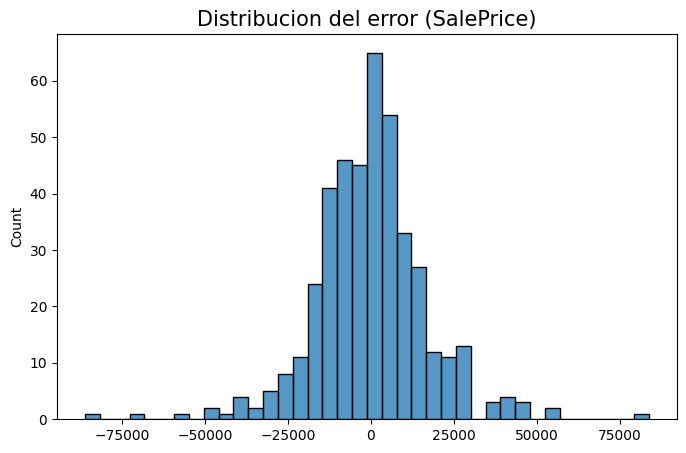

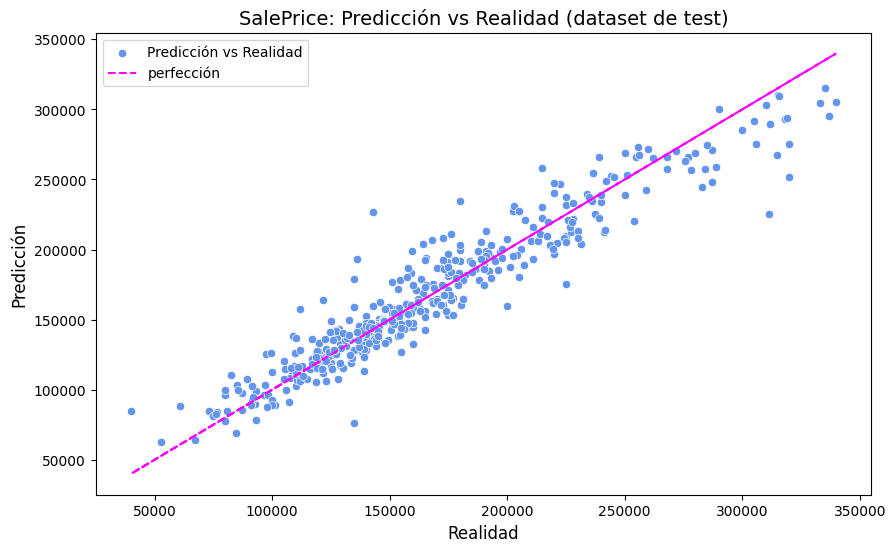

In [51]:
# Evaluación y Visualización del Error
# ------------------------------------

# 1. Predicción en el conjunto de prueba
y_pred_test = modelo_final.predict(X_test_scaled)
# Calcula las predicciones utilizando el modelo final entrenado (modelo_final) sobre el conjunto de prueba estandarizado (X_test_scaled).
# Estas predicciones se almacenan en y_pred_test.

# 2. Cálculo del RMSE en el conjunto de prueba
rmse_test = metrics.root_mean_squared_error(y_test, y_pred_test)
print(f"RMSE en el conjunto de prueba: {rmse_test}")
# Calcula el RMSE (Root Mean Squared Error) sobre el conjunto de prueba.
# Esto indica el error del modelo y sirve para medir la calidad de las predicciones.

# 3. Cálculo de los errores
errores = y_pred_test - y_test.values
# Calcula la diferencia entre las predicciones (y_pred_test) y los valores reales (y_test) de tu conjunto de test,
# obteniendo los errores de cada predicción.

# 4. Visualización de la distribución del error
plt.figure(figsize=(8, 5))
plt.title('Distribucion del error (SalePrice)', fontsize=15)
sns.histplot(errores)
plt.show()
# Muestra un histograma de los errores para entender cómo se distribuyen.

# 5. Visualización predicciones vs realidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, color='cornflowerblue', label='Predicción vs Realidad')
# Genera un scatterplot para visualizar las predicciones en función de la realidad (y_test vs y_pred_test).
# Utiliza los parámetros adecuados para que sea fácil de entender.

# Añadimos un lineplot de referencia, la línea de la perfección
plt.plot(y_test, y_test, color='magenta', linestyle='--', label='perfección')
# Se añade una línea magenta en el gráfico que indica la perfección.

# Añadimos títulos y leyendas
plt.title('SalePrice: Predicción vs Realidad (dataset de test)', fontsize=14)
plt.xlabel('Realidad', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.legend()
#  Añade títulos a los ejes y leyenda al gráfico.

# Mostrar el gráfico
plt.show()
# Muestra los gráficos

Interpretabilidad y Conclusiones: Interpretar el modelo y obtener conclusiones sobre tu proyecto.

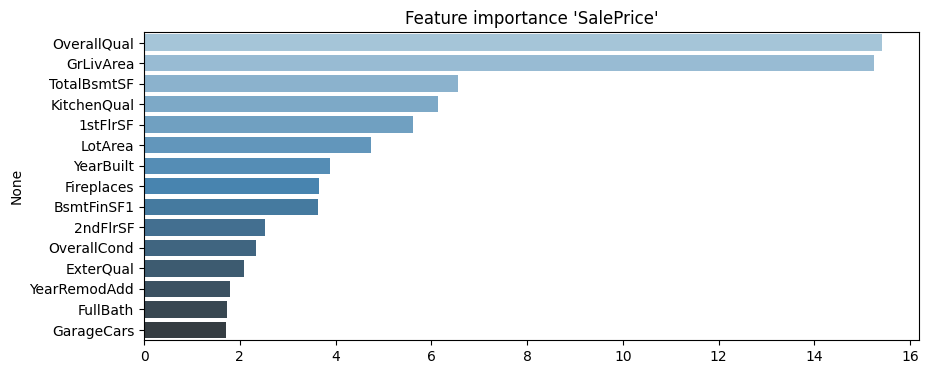

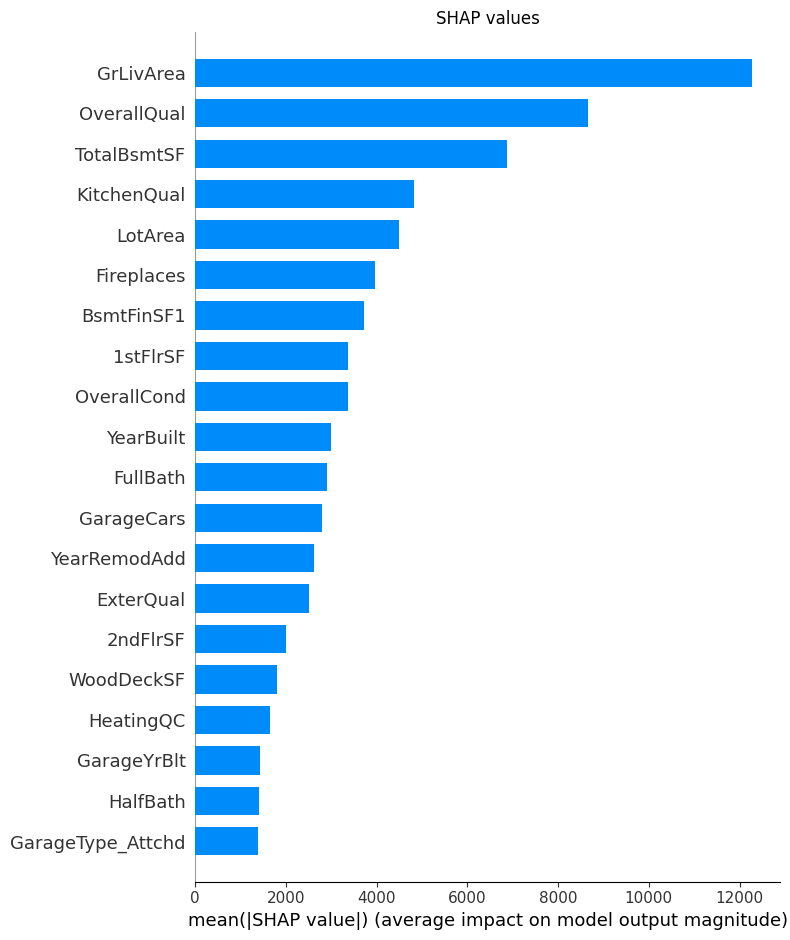

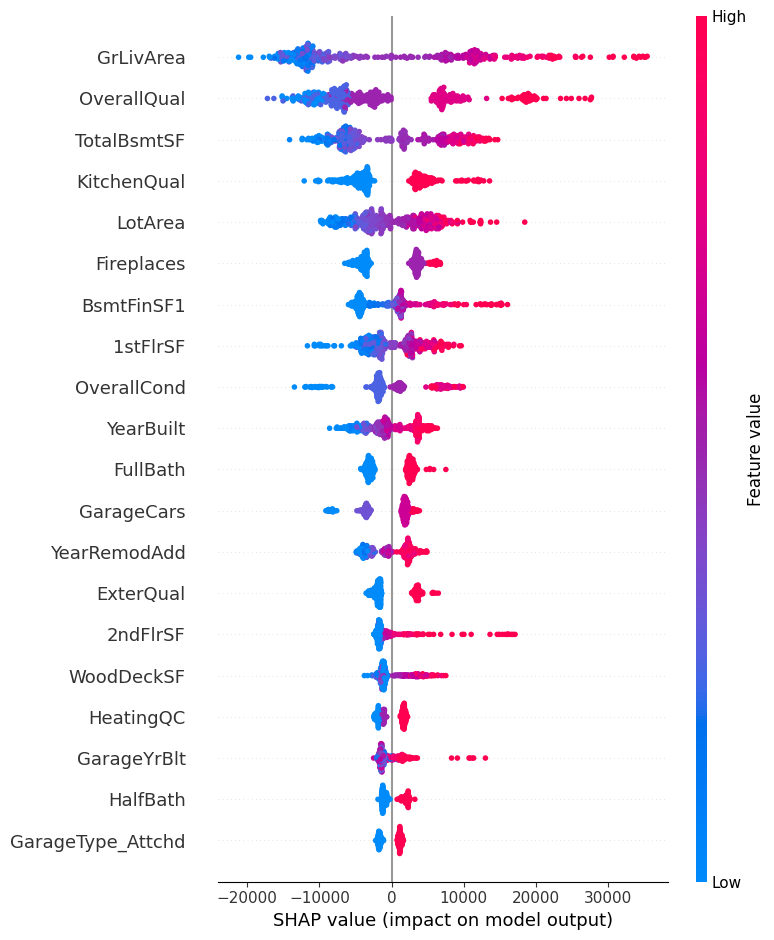


Conclusiones:
--------------------------------------------------------------------------
- El modelo final ha obtenido un RMSE de 17081.38 en el conjunto de prueba.
- Las variables más importantes para predecir el precio de las viviendas son:
 ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF', 'LotArea', 'YearBuilt', 'Fireplaces', 'BsmtFinSF1', '2ndFlrSF', 'OverallCond', 'ExterQual', 'YearRemodAdd', 'FullBath', 'GarageCars']
- El análisis SHAP revela el impacto individual de cada variable en la predicción.
--------------------------------------------------------------------------

Reflexiones y conclusiones adicionales:
--------------------------------------------------------------------------
- Tras analizar los resultados y ver la importancia de cada variable en el modelo, podemos concluir que la calidad general de la casa, la superficie habitable, y el año de construcción/reforma, son los factores más importantes para predecir el precio de venta de una casa en e

In [52]:
# Interpretabilidad y Conclusiones
# ---------------------------------

# 1. Feature Importance con CatBoost
features = modelo_final.feature_importances_
columnas = X.columns
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)[:15]
plt.figure(figsize=(10,4))
plt.title("Feature importance 'SalePrice'")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()


# 2. SHAP Values
# creamos un dataframe con los datos de X_test y las variables como columnas (por eso las guardamos antes)
df_X_test = pd.DataFrame(X_test_scaled, columns=X.columns)
explainer = shap.TreeExplainer(modelo_final)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)
shap.summary_plot(shap_values, df_X_test)

# 3. Conclusiones
print("\nConclusiones:")
print("--------------------------------------------------------------------------")
print(f"- El modelo final ha obtenido un RMSE de {rmse_test:.2f} en el conjunto de prueba.")
print(f"- Las variables más importantes para predecir el precio de las viviendas son:\n {imp.index.tolist()}")
print("- El análisis SHAP revela el impacto individual de cada variable en la predicción.")
print("--------------------------------------------------------------------------")

# Sección de Conclusiones
print("\nReflexiones y conclusiones adicionales:")
print("--------------------------------------------------------------------------")
print("- Tras analizar los resultados y ver la importancia de cada variable en el modelo, podemos concluir que la calidad general de la casa, la superficie habitable, y el año de construcción/reforma, son los factores más importantes para predecir el precio de venta de una casa en este conjunto de datos.")
print("- El modelo de CatBoostRegressor ha dado un buen resultado en el conjunto de test, con un RMSE de {rmse_test:.2f}, lo que indica que se ajusta bastante bien a las relaciones del conjunto de datos.")
print("- Sin embargo, es importante tener en cuenta que hay outliers y ciertos patrones complejos que el modelo podría mejorar.")
print("- Sería interesante realizar pruebas con otros modelos y hacer un estudio más profundo del impacto de las variables ordinales en el modelo.")
print("- Además, la cantidad de datos de entrenamiento es relativamente pequeña, por lo que aumentar la muestra podría mejorar la capacidad de predicción del modelo.")
print("- En definitiva, este proyecto sirve como una buena base para predecir el precio de una vivienda, aunque hay un amplio espacio para seguir mejorando el modelo y las transformaciones de variables.")
print("--------------------------------------------------------------------------")